# Relationships BRFSS
We will use scatter plots and other visualizations to extract insights from a new dataset obtained from the Behavioral Risk Factor Surveillance Survey (BRFSS)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf


In [3]:
brfss = pd.read_hdf('brfss.hdf5', 'brfss')
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


In [4]:
brfss.shape

(100000, 9)

In [5]:
brfss['AGE'].value_counts()

21.0    12566
32.0     9321
52.0     8652
57.0     8200
62.0     8182
27.0     8116
37.0     8067
42.0     8039
47.0     7284
67.0     6583
72.0     5365
89.5     4366
77.0     4053
Name: AGE, dtype: int64

In [6]:
brfss['AGE'].value_counts(normalize=True)

21.0    0.127194
32.0    0.094348
52.0    0.087576
57.0    0.083001
62.0    0.082819
27.0    0.082151
37.0    0.081655
42.0    0.081371
47.0    0.073729
67.0    0.066634
72.0    0.054305
89.5    0.044193
77.0    0.041025
Name: AGE, dtype: float64

## PMF of Age

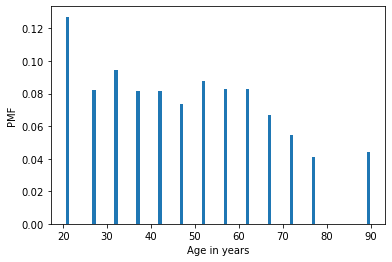

In [7]:
# Extract age
age = brfss['AGE']

# Plot the PMF
pmf_age = Pmf.from_seq(age)
pmf_age.bar(label='age')

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

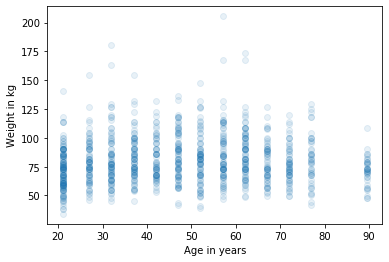

In [8]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

## Jittering

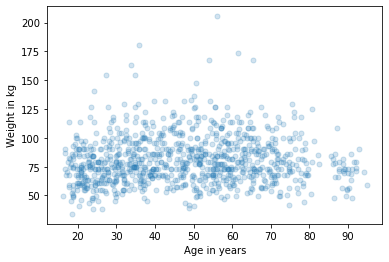

In [9]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize=5, alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

## Violin Plot

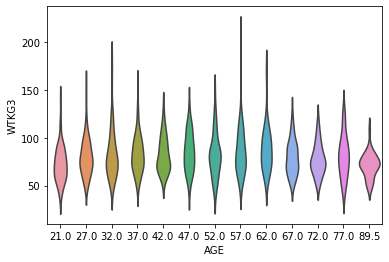

In [10]:
data = brfss.dropna(subset=['AGE','WTKG3'])
sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)
plt.show()

## Box Plot

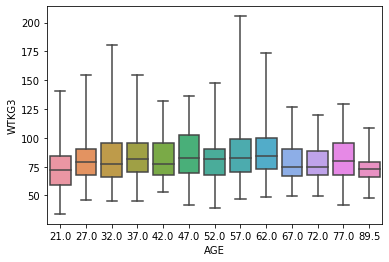

In [11]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=5)
plt.show()

## Height and Weight

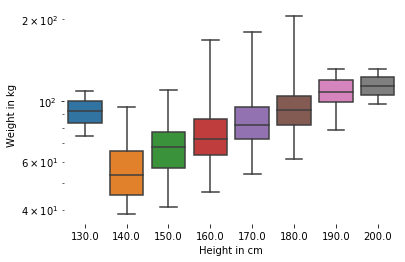

In [12]:
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


## Distribution of Income

In [13]:
brfss['INCOME2'].value_counts()

8.0    302
7.0    114
6.0    101
5.0     97
4.0     72
3.0     65
2.0     46
1.0     39
Name: INCOME2, dtype: int64

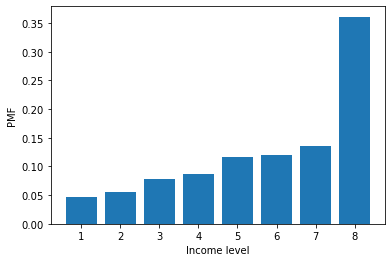

In [14]:
# Extract income
income = brfss['INCOME2']

# Plot the PMF
pmf_income = Pmf.from_seq(income)
pmf_income.bar(label='income')

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

## Computing correlations

In [15]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.014141 -0.021548
INCOME2  -0.014141  1.000000  0.115264
_VEGESU1 -0.021548  0.115264  1.000000


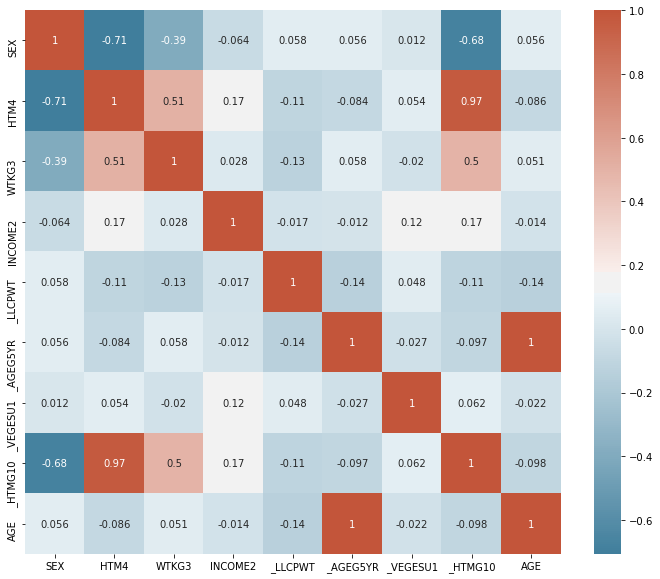

In [22]:
corr = brfss.corr()

f, ax = plt.subplots(figsize=(12, 10))
# mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
sns.heatmap(corr, annot=True, cmap=cmap)

## Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2'].values[:, np.newaxis]
ys = subset['_VEGESU1'].values

# Create & train model
lm = LinearRegression()
lm.fit(xs, ys)

# Menampilkan nilai coef & intercept
print('Coeficient: ', lm.coef_)
print('Intercept: ', lm.intercept_)

Coeficient:  [0.07000027]
Intercept:  1.5413758521321232


In [34]:
# Persamaan regresi
# y = ax + b
# y = 0.07000 * x + 1.5413

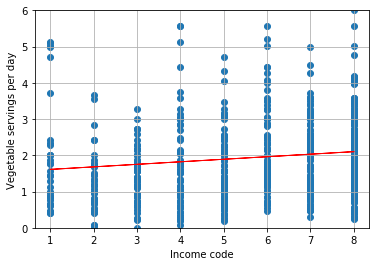

In [40]:
pred = lm.predict(xs)
plt.scatter(xs, ys)
plt.plot(xs, pred, color='red',linewidth=1)
plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.grid()
plt.show()